The goal of this notebook is to explore the distributions of the test, valid and train data sets.

In [1]:
import pandas as pd
import numpy as np
import deepchem as dc

No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!
Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\gzyla\Documents\projects\HPLC\HPLC_ML_Leaderboard\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lig

In [2]:
df = pd.read_csv('..\..\ml\shareddata\All_column_charity.csv')
df

,Unnamed: 0,index,SMILES,RT,Speed,i-PrOH_proportion,Literature,Column
0,0,0,O=C(OC)N(C)[C@@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=C...,2.14,0.5,0.050000,10.1039/C9SC04534A,OJ3
1,1,0,O=C(OC)N(C)[C@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=CC=C2,1.81,0.5,0.050000,10.1039/C9SC04534A,OJ3
2,2,1,C=CCCCCCCC[C@@H](C[C@@]1(CCCC1=O)c2ccccc2)C=O,0.97,2.0,0.076923,10.1002/anie.202001100,AD3
3,3,2,C[C@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)(F)F,2.13,0.5,0.300000,10.1039/C8QO01291A,IA
4,4,2,C[C@@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)...,2.30,0.5,0.300000,10.1039/C8QO01291A,IA
...,...,...,...,...,...,...,...,...
25862,25862,14144,COc1ccc2N(COCc3ccccc3)C(=O)[C@](CO)(\C=C\c4ccc...,119.10,0.8,0.050000,10.31635/ccschem.019.20190064,IC3
25863,25863,14144,COc1ccc2N(COCc3ccccc3)C(=O)[C@@](CO)(\C=C\c4cc...,98.90,0.8,0.050000,10.31635/ccschem.019.20190064,IC3
25864,25864,14145,Fc1cccc2[C@@H](OC(=O)C(c3ccccc3)c4ccccc4)OC(=O...,75.30,0.8,0.100000,10.1002/anie.202012445,IC3
25865,25865,14145,Fc1cccc2[C@H](OC(=O)C(c3ccccc3)c4ccccc4)OC(=O)c12,99.60,0.8,0.100000,10.1002/anie.202012445,IC3


In [3]:
smiles = df['SMILES'].values
labels = df["RT"].values
features = df.filter(['index','Speed','i-PrOH_proportion','Column'])
dataset = dc.data.NumpyDataset(X=features, y=labels, ids=smiles)
print("\n--- Created DeepChem Dataset ---")
print(f"Dataset IDs (SMILES): {dataset.ids[:5]}...") # Show first few SMILES
print(f"Dataset Features (X shape): {dataset.X.shape}")
print(f"Dataset Labels (y shape): {dataset.y.shape}")


--- Created DeepChem Dataset ---
Dataset IDs (SMILES): ['O=C(OC)N(C)[C@@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=CC=C2'
 'O=C(OC)N(C)[C@H](B1OC(C)(C)C(C)(C)O1)CC2=CC=CC=C2'
 'C=CCCCCCCC[C@@H](C[C@@]1(CCCC1=O)c2ccccc2)C=O'
 'C[C@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)(F)F'
 'C[C@@H](C[S](=O)(=O)c1ccc(C)cc1)c2ccc(cc2)C(F)(F)F']...
Dataset Features (X shape): (25867, 4)
Dataset Labels (y shape): (25867,)


In [4]:
# Bemis, Guy W., and Mark A. Murcko split
splitter = dc.splits.ScaffoldSplitter()

In [5]:
indices= splitter.split(dataset)
len(indices)

3

In [6]:
train_index = indices[0]
test_index = indices[1]
valid_index = indices[2]

print(f'train, test and valid sizes {len(train_index)},{len(test_index)},{len(valid_index)}')

train, test and valid sizes 20693,2587,2587


In [7]:
# count enantiomer pairs in sets
train_df= df.iloc[train_index]
test_df= df.iloc[test_index]
valid_df= df.iloc[valid_index]

train_enantiomer_pair_count = len(train_df['index'])-len(train_df['index'].drop_duplicates())
test_enantiomer_pair_count = len(test_df['index'])-len(test_df['index'].drop_duplicates())
valid_enantiomer_pair_count = len(valid_df['index'])-len(valid_df['index'].drop_duplicates())

print(f'the number of enantiomer pairs in the train, test and valid set are {train_enantiomer_pair_count},{test_enantiomer_pair_count} and {valid_enantiomer_pair_count} respectively')

the number of enantiomer pairs in the train, test and valid set are 9469,1215 and 1036 respectively


Based on the numbers it looks like data sets contain both enantiomer pairs for the most part

In [8]:
from utils import grand_tanimoto_similarity_mean
test_valid_similarity= grand_tanimoto_similarity_mean(test_df['SMILES'],valid_df['SMILES'])
# test_train_similarity= grand_tanimoto_similarity_mean(test_df['SMILES'],train_df['SMILES'])
# valid_train_similarity= grand_tanimoto_similarity_mean(valid_df['SMILES'],train_df['SMILES'])
print(test_valid_similarity)

0.1343324003393441


The valid and test set are not similar

In [9]:
from utils import tanimoto_similarity_mean
similarity_list = tanimoto_similarity_mean(test_df['SMILES'],valid_df['SMILES'])


In [10]:
import matplotlib.pyplot as plt

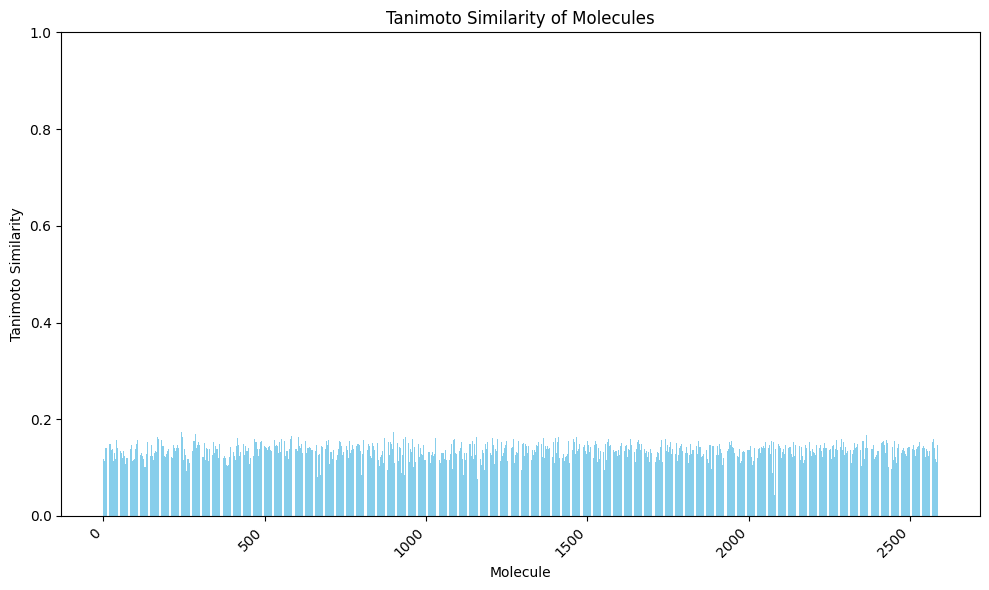

In [11]:
# Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(range(0,len(similarity_list)), similarity_list, color='skyblue')

# Adding labels and title
plt.xlabel('Molecule')
plt.ylabel('Tanimoto Similarity')
plt.title('Tanimoto Similarity of Molecules')
plt.ylim(0, 1) # Tanimoto similarity is between 0 and 1

# Rotating x-axis labels if necessary for readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

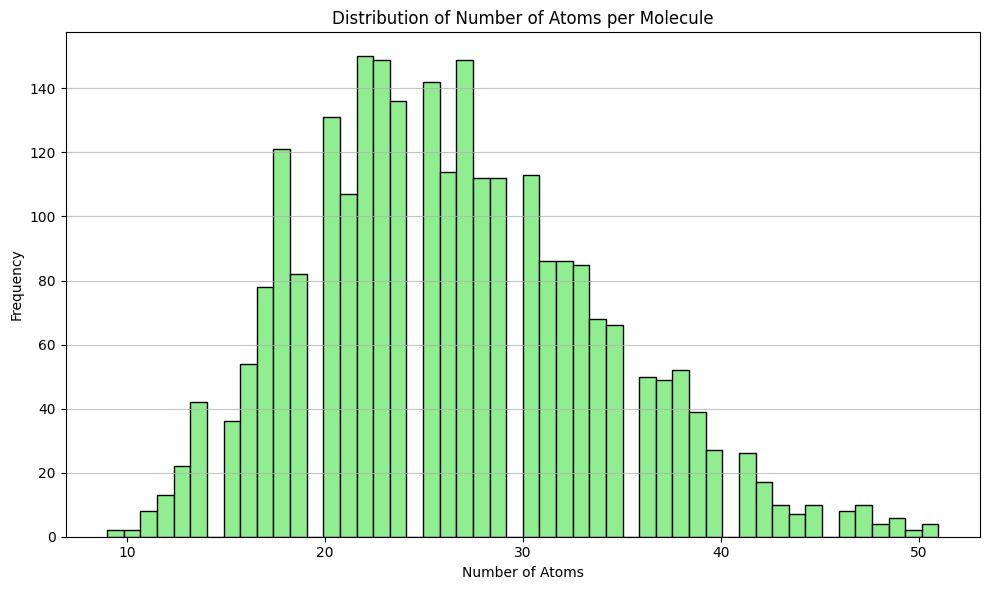

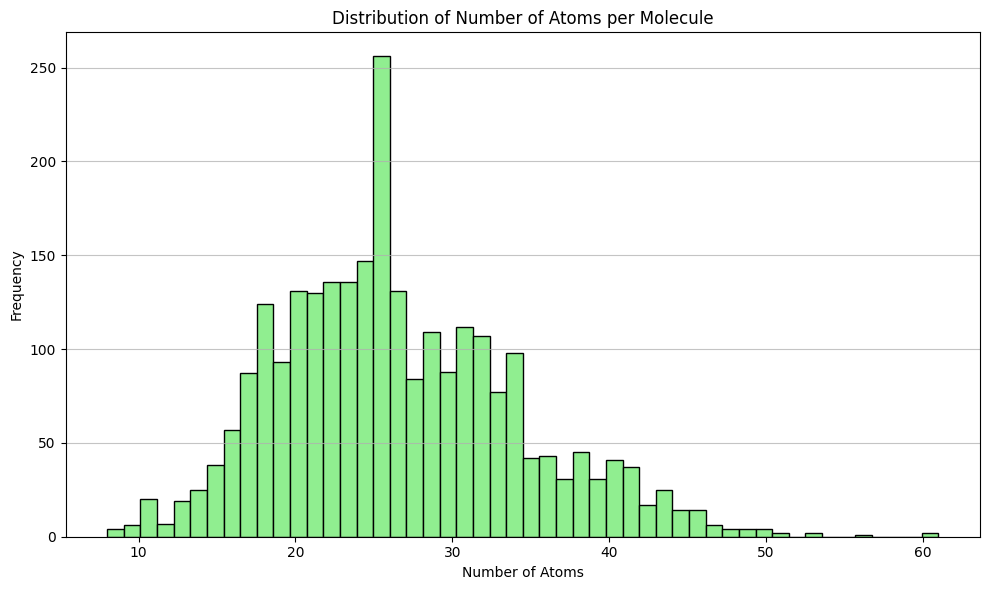

In [12]:
# number of atoms vs molecule count (H,C,N,O,total)
from utils import plot_num_atoms_per_molecule

plot_num_atoms_per_molecule(test_df['SMILES'].to_list())
plot_num_atoms_per_molecule(valid_df['SMILES'].to_list())



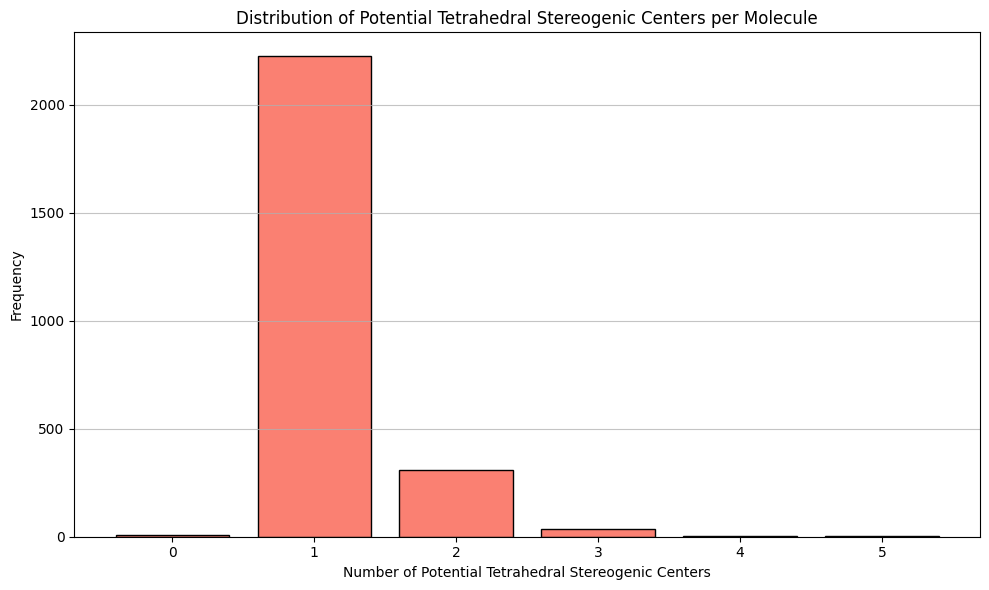

In [13]:
# Sterogenic centers
from utils import plot_stereogenic_centers_per_molecule
plot_stereogenic_centers_per_molecule(test_df['SMILES'].to_list())

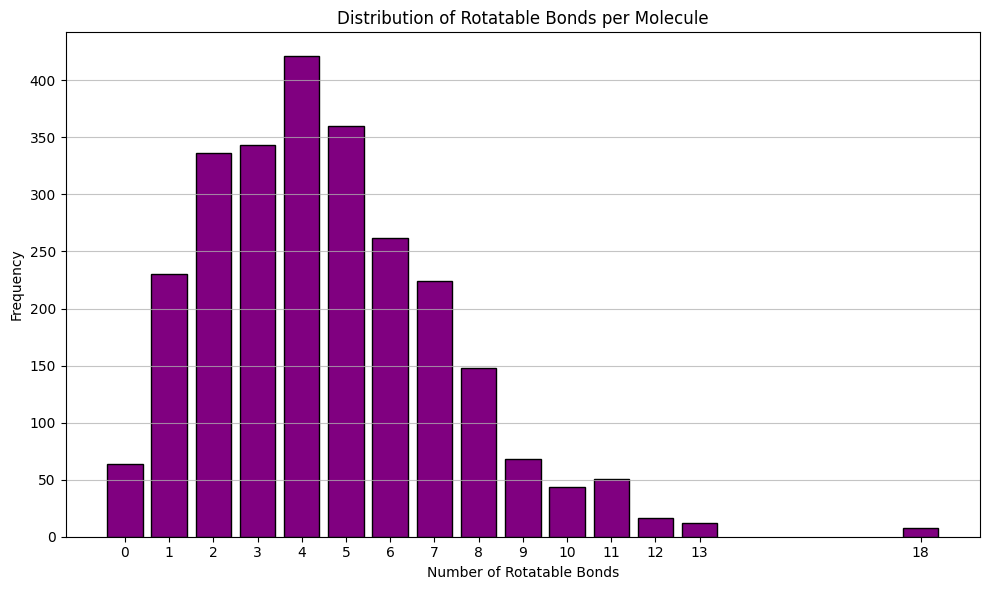

In [14]:
# rotatble bond number
from utils import plot_rotatable_bonds_per_molecule

plot_rotatable_bonds_per_molecule(test_df['SMILES'].to_list())

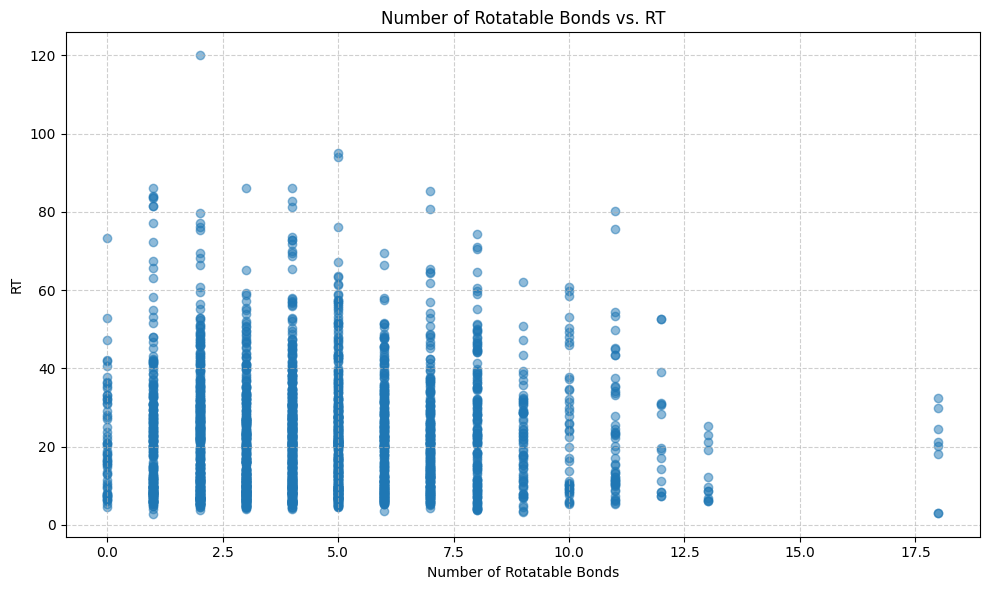


Processed 2587 valid molecules.


In [15]:
from utils import plot_rotatable_bonds_vs_property

plot_rotatable_bonds_vs_property(test_df, 'SMILES', 'RT')